<a href="https://colab.research.google.com/github/yatiraj1/visualization_centre/blob/master/notebooks/India_export_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U kaleido


In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Set the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# Choose the folder where you want your project files to be saved
project_folder = "projects/India via Data/India export category"
os.chdir(root_dir+project_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls = []
for i in range(17,25):
  temp_df = pd.read_csv(f'ex{i}-{i+1}.csv')
  temp_df.columns = ['commodity', 'total_exports', 'last_month','penultimate_month','mom_growth', 'pc_share', 'year']
  temp_df['year'] = int(f'20{i+1}')
  ls.append(temp_df)

ex = pd.concat(ls, ignore_index=True)


In [ ]:
ex.head()

,commodity,total_exports,last_month,penultimate_month,mom_growth,pc_share,year
0,Engineering Goods,"78,646.43","8,094.95","6,533.39",23.90%,26.16%,2018
1,Gems And Jewellery,"41,541.68","3,435.86","3,805.79",-9.72%,13.82%,2018
2,Petroleum Products,"34,884.71","2,976.03","3,147.91",-5.46%,11.60%,2018
3,Organic and Inorganic Chemicals,"18,415.59","1,971.94","1,659.10",18.86%,6.12%,2018
4,Drugs And Pharmaceuticals,"17,265.29","1,760.08","1,388.05",26.80%,5.74%,2018


CLeanup

In [ ]:
commodity_list = ['Engineering Goods',
 'Petroleum Products',
'Electronic Goods',
 'Gems And Jewellery',
 'Drugs And Pharmaceuticals',
 'Organic and Inorganic Chemicals',
 'Others',
 'Ready-made garments of all textiles',
 'Rice',
 'Cotton Yarn/Fabs./Madeups, Handloom Products Etc.']

In [ ]:
ex = ex[ex['commodity'].isin(commodity_list)]

In [ ]:
#ex.head()

,commodity,total_exports,last_month,penultimate_month,mom_growth,pc_share,year,share
0,Engineering Goods,"78,646.43","8,094.95","6,533.39",23.90%,26.16%,2018,0.261
1,Gems And Jewellery,"41,541.68","3,435.86","3,805.79",-9.72%,13.82%,2018,0.138
2,Petroleum Products,"34,884.71","2,976.03","3,147.91",-5.46%,11.60%,2018,0.116
3,Organic and Inorganic Chemicals,"18,415.59","1,971.94","1,659.10",18.86%,6.12%,2018,0.061
4,Drugs And Pharmaceuticals,"17,265.29","1,760.08","1,388.05",26.80%,5.74%,2018,0.057


In [ ]:
ex['share'] = ex['pc_share'].apply(lambda x: float(x[:-2]))/100

In [ ]:
# prompt: use plotly to create a stacked area chart from the dataframe, ex. Have pc_share on y-axis broken by commodity. x-axis will be year

fig = go.Figure()

for commodity in ex['commodity'].unique():
    fig.add_trace(go.Scatter(
        x=ex[ex['commodity'] == commodity]['year'],
        y=ex[ex['commodity'] == commodity]['share'],
        stackgroup='one',
        name=commodity
    ))

fig.update_layout(title_text="Stacked Area Chart of PC Share by Commodity and Year",
                  xaxis_title="Year",
                  yaxis_title="PC Share")
fig.show()
# Save the chart as a PNG file
#fig.write_image("stacked_area_chart.png")


In [ ]:

category_orders

{'Engineering Goods': 0,
 'Petroleum Products': 1,
 'Electronic Goods': 2,
 'Gems And Jewellery': 3,
 'Drugs And Pharmaceuticals': 4,
 'Organic and Inorganic Chemicals': 5,
 'Others': 6,
 'Ready-made garments of all textiles': 7,
 'Rice': 8,
 'Cotton Yarn/Fabs./Madeups, Handloom Products Etc.': 9}

In [ ]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [ ]:
# prompt: create a stacked area chart from the dataframe, ex. Have pc_share on y-axis broken by commodity. x-axis will be year

category_orders = dict(zip(reversed(commodity_list), range(len(commodity_list))))
import plotly.express as px

fig = px.area(ex, x="year", y="share", color="commodity", category_orders=category_orders,
              color_discrete_sequence=px.colors.qualitative.D3,
              #color_discrete_sequence=px.colors.sequential.Viridis,
              #groupnorm='percent'
              )
fig.update_layout(title_text="Share of categories in top 10 exports from India",
                  xaxis_title="Year",
                  yaxis_title="Fraction",
                  )
for i in range(len(commodity_list)):
  fig['data'][i]['line']['width']=0

fig.add_annotation(
    x=0.1,
    y=0.2,
    showarrow=False,
    text=u"\u00A9"+str("India via Data"),  # Use the Unicode for the copyright symbol
    xref="paper",
    yref="paper"
    )
fig.show()
fig.write_image("exports_stacked_area_chart.png")


In [ ]:
# prompt: create a stacked area chart from the dataframe, ex. Have pc_share on y-axis broken by commodity. x-axis will be year

import plotly.express as px

fig = px.area(ex, x="year", y="share", color="commodity", line_group="commodity",)
fig.update_layout(title_text="Stacked Area Chart of PC Share by Commodity and Year",
                  xaxis_title="Year",
                  yaxis_title="PC Share",
                  )
fig.show()


In [ ]:
temp_df.head(10).commodity.tolist()

['Engineering Goods',
 'Petroleum Products',
 'Electronic Goods',
 'Gems And Jewellery',
 'Drugs And Pharmaceuticals',
 'Organic and Inorganic Chemicals',
 'Others',
 'Ready-made garments of all textiles',
 'Rice',
 'Cotton Yarn/Fabs./Madeups, Handloom Products Etc.']

<Figure size 1000x600 with 0 Axes>

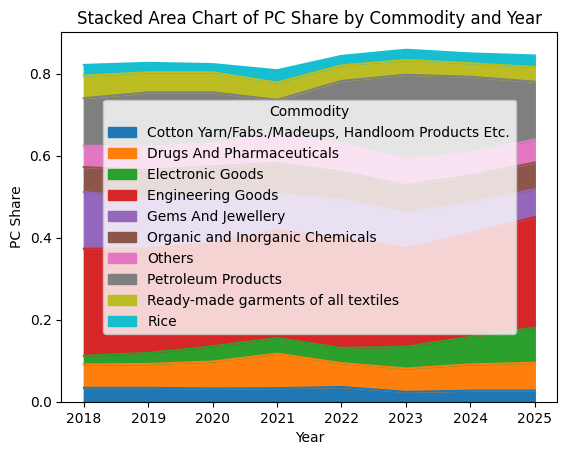

In [ ]:
# prompt: create a stacked area chart from the dataframe, ex. Have share on y-axis broken by commodity. x-axis will be year.
# use matplotlib

import matplotlib.pyplot as plt

# Create the stacked area chart using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Group the data by year and commodity
grouped_data = ex.groupby(['year', 'commodity'])['share'].sum().unstack()

grouped_data.plot(kind='area', stacked=True)

plt.title('Stacked Area Chart of PC Share by Commodity and Year')
plt.xlabel('Year')
plt.ylabel('PC Share')
plt.legend(title='Commodity')
plt.show()
